#### IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### LOAD THE DATASET

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### EDA

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### HANDLE MISSING VALUES

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### BASIC VISUALIZATION

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

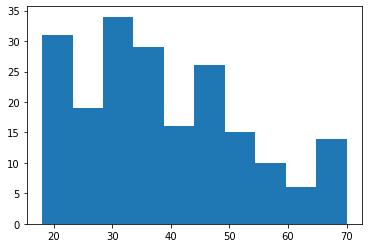

In [41]:
plt.hist(df['Age'])

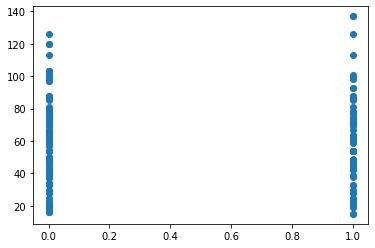

In [42]:
plt.scatter(df['Genre'],df['Annual Income (k$)'])

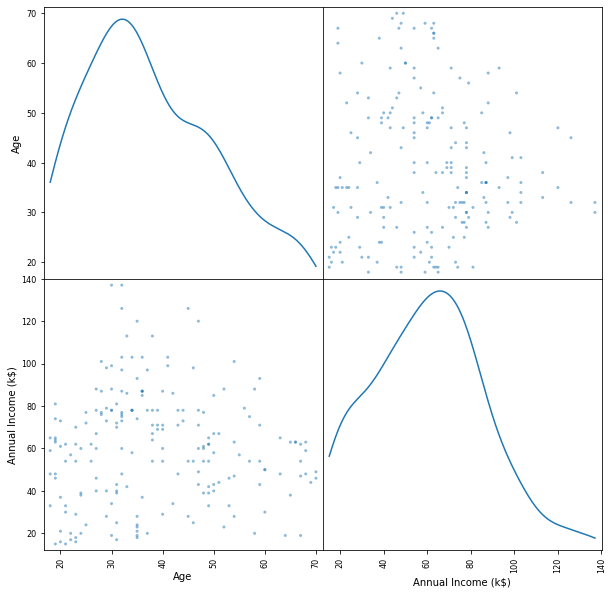

In [44]:
pd.plotting.scatter_matrix(df.loc[:,"Age":"Annual Income (k$)" ], diagonal="kde",figsize=(10,10))
plt.show()

#### FIND THE OUTLIERS AND REPLACE THEM

<AxesSubplot:xlabel='CustomerID'>

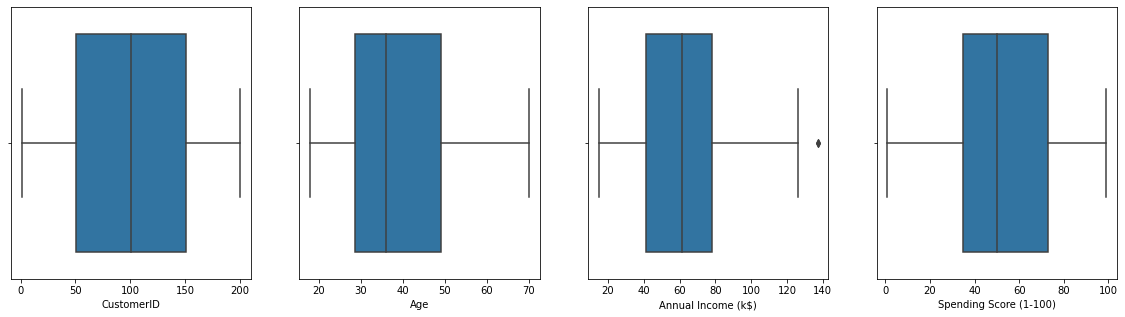

In [8]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=df['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=df['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=df['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=df['CustomerID'])

In [9]:
OL=df.quantile(q=[0.25,0.75])
OL

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [10]:
OL.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [11]:
OL.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [12]:
iqr=OL.loc[0.75]-OL.loc[0.25] 
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [13]:
low=OL.loc[0.25]-(1.5*iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [14]:
up=OL.loc[0.75]+(1.5*iqr)
up

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

#### CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [15]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df['Genre'].replace({'Male':1,'Female':0},inplace=True)

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### 3D VISUALIZATION

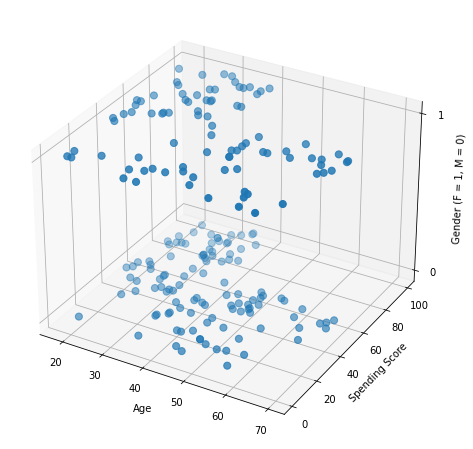

In [18]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")

x = df["Age"].values
z = df["Genre"].values
y = df["Spending Score (1-100)"].values

img = ax.scatter(x, y, z, s=50)
ax.set_zticks([0, 1])
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Gender (F = 1, M = 0)')
plt.show()

#### CLUSTERING

In [19]:
from sklearn.cluster import KMeans

In [20]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

In [21]:
TWSS


[387065.7137713771,
 271384.50878286804,
 195401.19855991466,
 157505.72072477572,
 122630.44175335612,
 103233.01724386723,
 86053.67444777445]

Text(0, 0.5, 'TWSS')

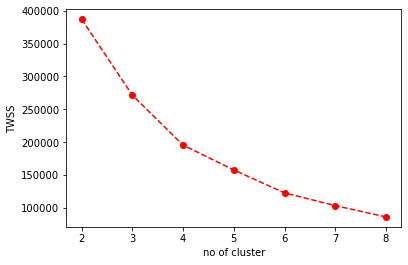

In [22]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [23]:
model=KMeans(n_clusters=4)

model.fit(df)

KMeans(n_clusters=4)

In [24]:
model.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [25]:
mb=pd.Series(model.labels_)

In [26]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [27]:
df['clust']=mb

#### SPLITTING THE DATA 

In [28]:
y=df['clust']
y


0      3
1      3
2      3
3      3
4      3
      ..
195    2
196    1
197    2
198    1
199    2
Name: clust, Length: 200, dtype: int32

In [29]:
x=df.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier()

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
#prediction
pred=rf.predict(x_test)

#### EVALUATION METRICS

In [37]:
## Accuracy of DT model 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.975

In [38]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[ 9,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0, 10,  0],
       [ 1,  0,  0, 12]], dtype=int64)